In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
import pickle
import warnings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_CW_010/adult.csv')

In [ ]:
#Load dataset
#df=pd.read_csv("adult.csv",skipinitialspace=True)

In [ ]:
df.columns = [c.strip().lower() for c in df.columns] #this avoid the spaces infront of the colunm name and lowercase

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")


Dataset Shape: (48842, 15)
Number of Records: 48842
Number of Features: 15


In [ ]:
# Check duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("⚠️  Removing duplicates...")
    df = df.drop_duplicates()
    print(f"✓ Removed {duplicate_count} duplicates")


Duplicate rows: 52
⚠️  Removing duplicates...
✓ Removed 52 duplicates


In [ ]:
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")


Dataset Shape: (48790, 15)
Number of Records: 48790
Number of Features: 15


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   fnlwgt          48790 non-null  int64 
 3   education       48790 non-null  object
 4   education-num   48790 non-null  int64 
 5   marital-status  48790 non-null  object
 6   occupation      48790 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   gender          48790 non-null  object
 10  capital-gain    48790 non-null  int64 
 11  capital-loss    48790 non-null  int64 
 12  hours-per-week  48790 non-null  int64 
 13  native-country  48790 non-null  object
 14  income          48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB
None


In [ ]:
for col in df.select_dtypes(include="object").columns:
    print(f"\n--- {col} ---")
    print(df[col].unique()[:20])   # show first 20 unique values
    print("Total unique:", df[col].nunique())


--- workclass ---
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Total unique: 9

--- education ---
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Total unique: 16

--- marital-status ---
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Total unique: 7

--- occupation ---
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Total unique: 15

--- relationship ---
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Total unique: 6

--- race ---
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Total uni

In [ ]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48790.000000  4.879000e+04   48790.000000  48790.000000  48790.000000   
mean      38.652798  1.896690e+05      10.078807   1080.217688     87.595573   
std       13.708493  1.056172e+05       2.570046   7455.905921    403.209129   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781385e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376062e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48790.000000  
mean        40.425886  
std         12.392729  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

#calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)


Missing Values Summary:
            Column  Missing_Count  Missing_Percentage
6       occupation           2805            5.749129
1        workclass           2795            5.728633
13  native-country            856            1.754458


In [ ]:

# Full Summary table to get dtype, #unique, #missing, %missing
summ = (
    pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "n_unique": df.nunique(dropna=True),
        "n_missing": df.isna().sum(),
    })
    .assign(pct_missing=lambda x: (100 * x["n_missing"] / len(df)).round(2))
    .sort_values("pct_missing", ascending=False)
)
display(summ.head(20))

,dtype,n_unique,n_missing,pct_missing
occupation,object,14,2805,5.75
workclass,object,8,2795,5.73
native-country,object,41,856,1.75
fnlwgt,int64,28523,0,0.00
education,object,16,0,0.00
education-num,int64,16,0,0.00
age,int64,74,0,0.00
marital-status,object,7,0,0.00
relationship,object,6,0,0.00
gender,object,2,0,0.00


In [ ]:
# Drop fnlwgt since it's a census weight and not a predictive feature
df = df.drop(columns=["fnlwgt"], errors="ignore")

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Clean target variable...remove leading/trailing spaces and dots
df['income'] = df['income'].str.strip().str.replace('.', '')

# Count and percentage
target_counts = df['income'].value_counts()
target_percentage = df['income'].value_counts(normalize=True) * 100

print("\nTarget Variable Distribution:")
print(f"<=50K: {target_counts.get('<=50K', 0)} ({target_percentage.get('<=50K', 0):.2f}%)")
print(f">50K: {target_counts.get('>50K', 0)} ({target_percentage.get('>50K', 0):.2f}%)")



Target Variable Distribution:
<=50K: 37109 (76.06%)
>50K: 11681 (23.94%)


In [ ]:
# Calculate imbalance ratio
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")


Class Imbalance Ratio: 3.18:1


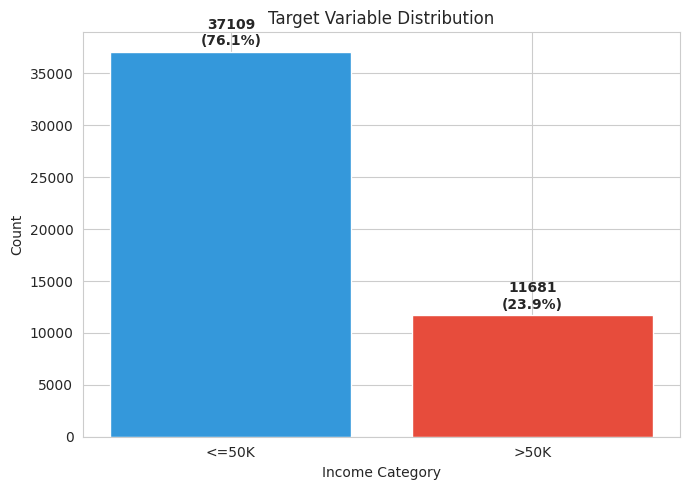

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.bar(target_counts.index, target_counts.values, color=['#3498db', '#e74c3c'])
plt.ylabel('Count')
plt.xlabel('Income Category')
plt.title('Target Variable Distribution')

# Add value + percentage labels above bars
for i, (cat, val) in enumerate(target_counts.items()):
    pct = target_percentage.get(cat, 0.0)
    plt.text(i, val + max(target_counts.values)*0.01, f'{val}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

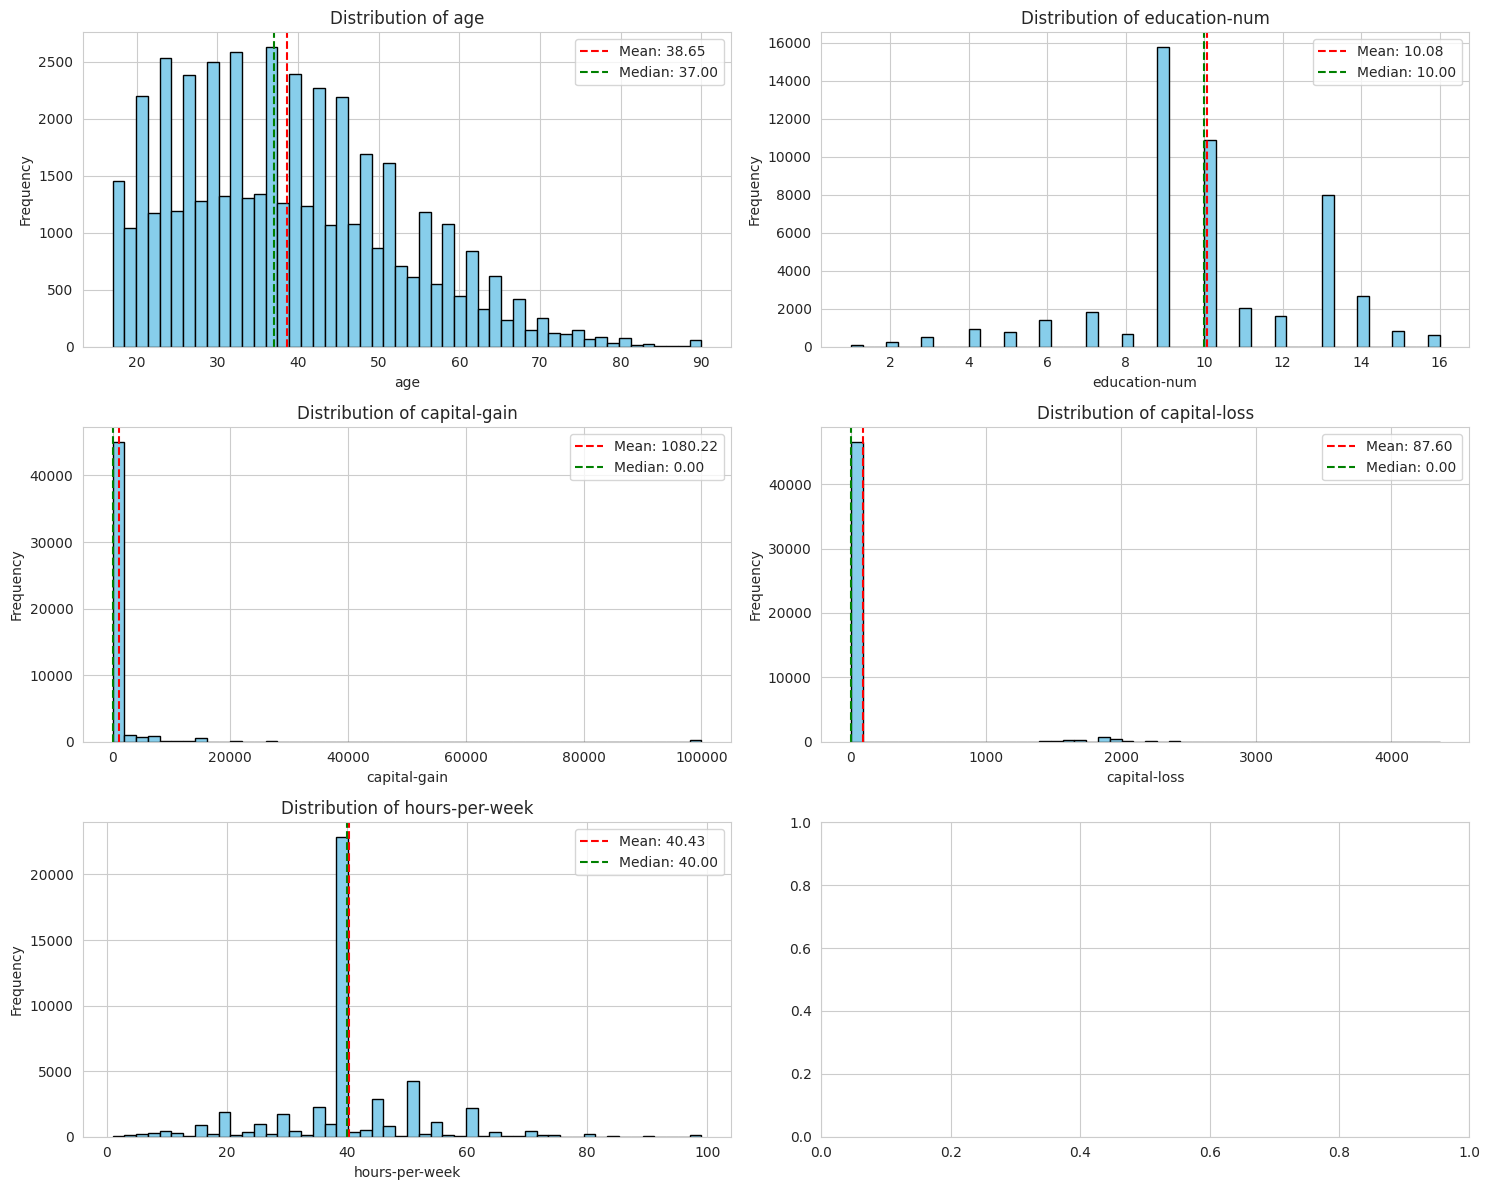

In [ ]:
#Analyze numerical features

numerical_features = ['age', 'education-num', 'capital-gain',
                      'capital-loss', 'hours-per-week']

# Distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Outlier detection using IQR
print("\nOutlier Detection (IQR Method):")
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")



Outlier Detection (IQR Method):
age: 215 outliers (0.44%)
education-num: 1787 outliers (3.66%)
capital-gain: 4035 outliers (8.27%)
capital-loss: 2282 outliers (4.68%)
hours-per-week: 13486 outliers (27.64%)


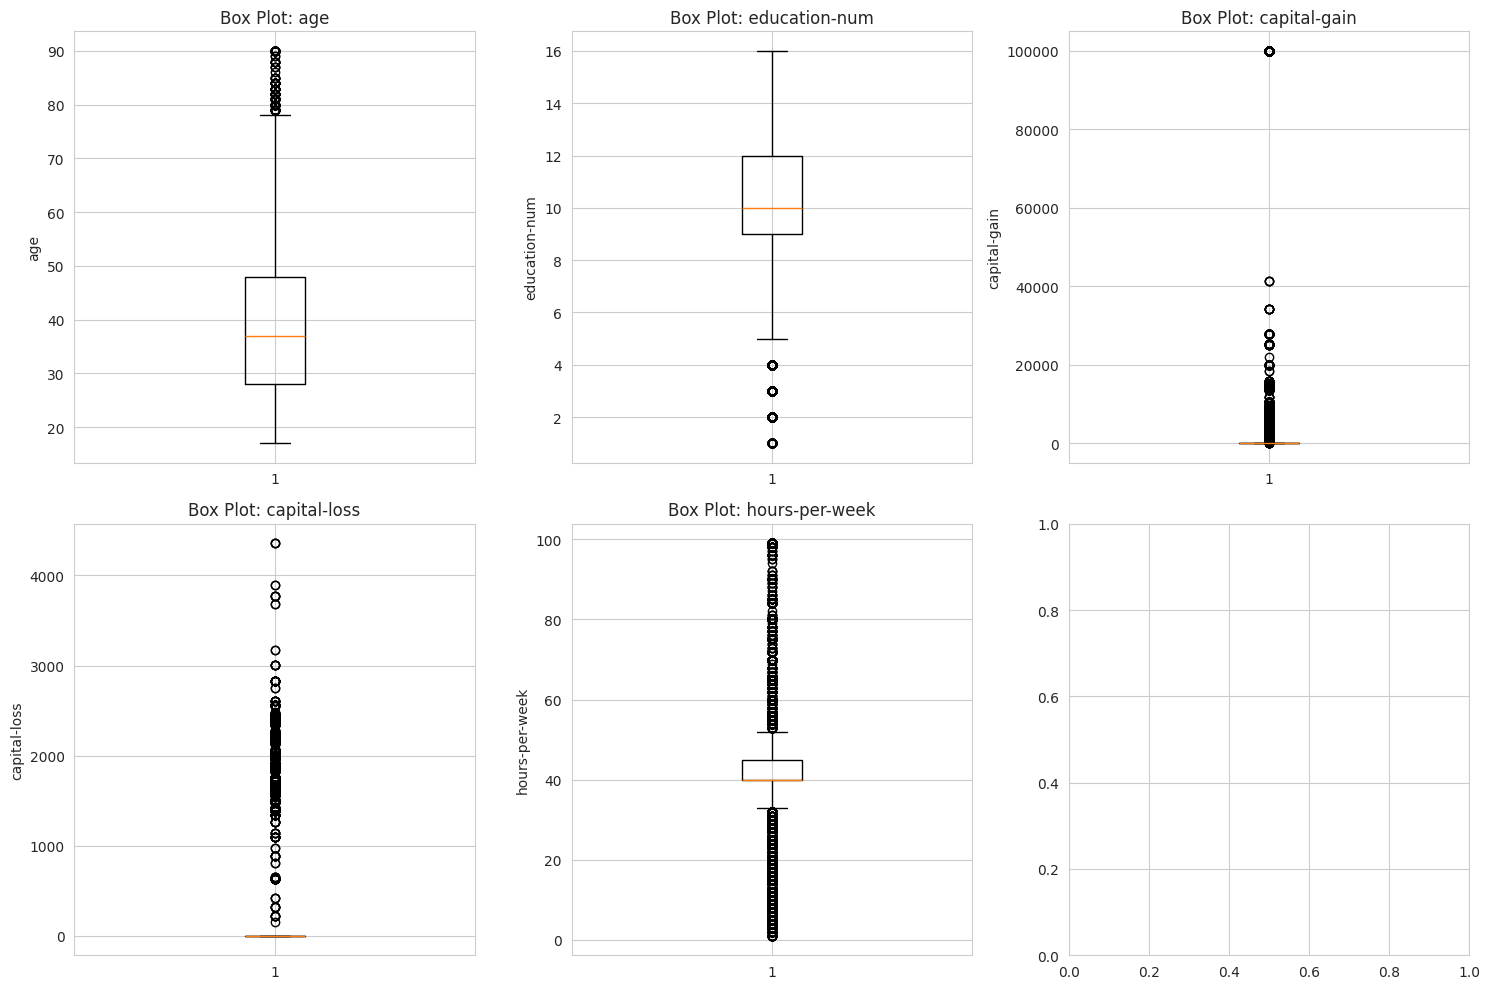

In [ ]:
# Box plots for outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Categorical feature analysis
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender', 'native-country']

# Value counts for each categorical feature
for col in categorical_features:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


WORKCLASS:
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Unique values: 8

EDUCATION:
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
Unique values: 16

MARITAL-STATUS:
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
Unique values: 7

OCCUPATION:
occu

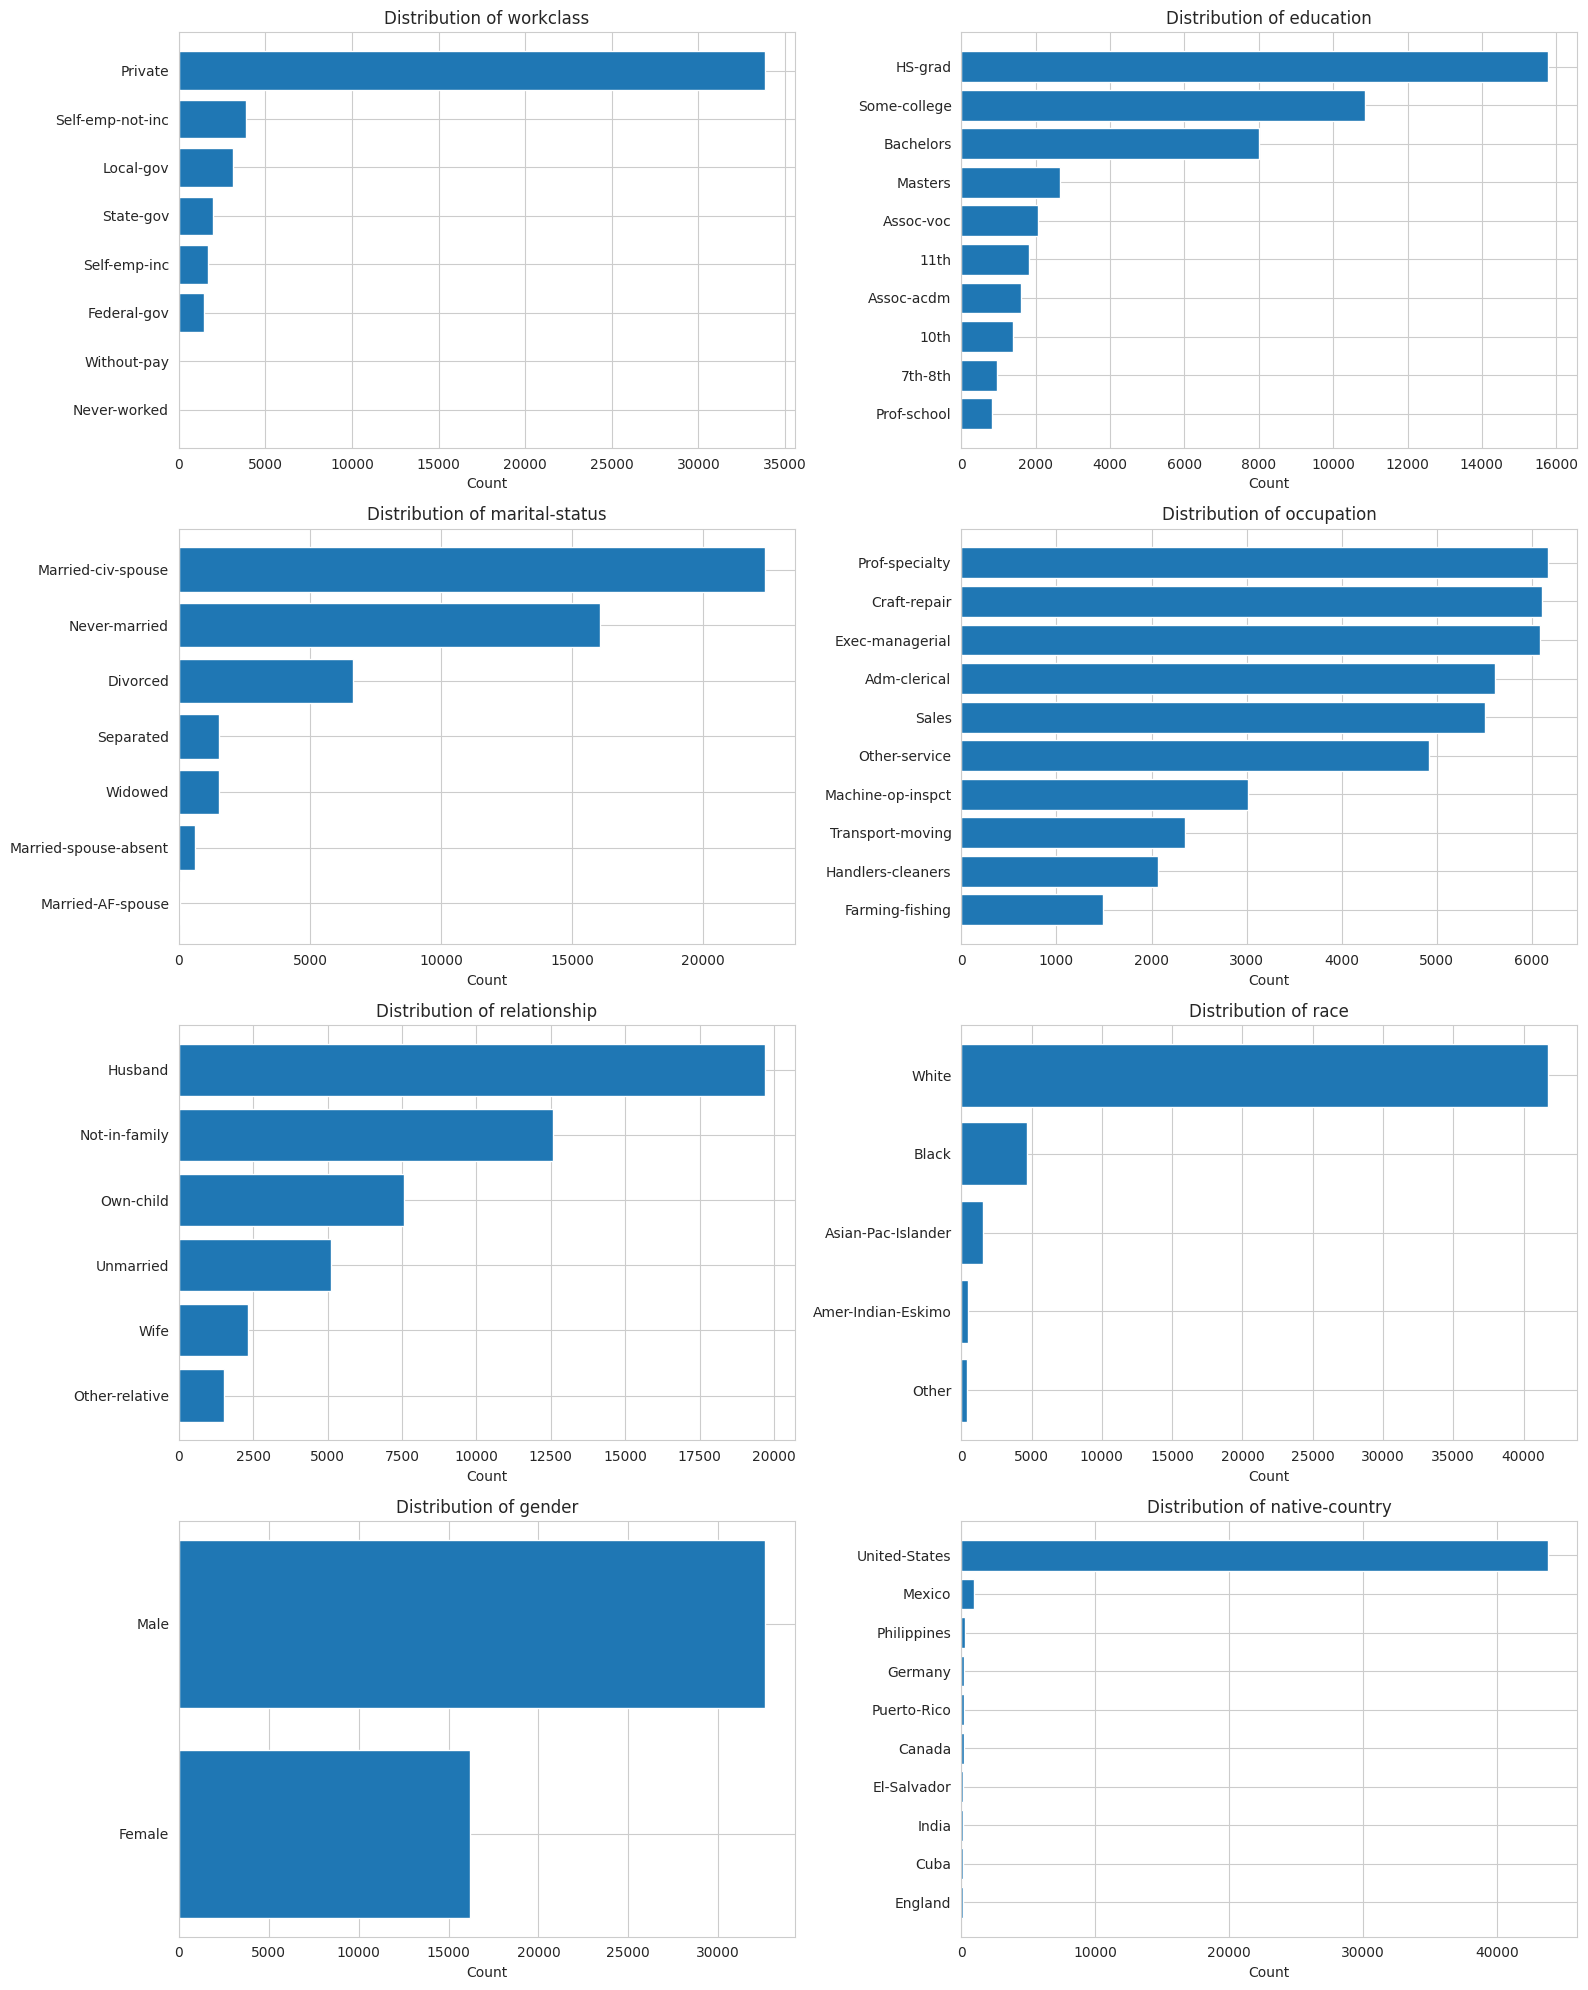

In [ ]:
# Visualize categorical features
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts().head(10)  # Top 10 categories
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



Correlation with Target (Income):
income_binary     1.000000
education-num     0.332802
age               0.230144
hours-per-week    0.227664
capital-gain      0.223047
capital-loss      0.147542
Name: income_binary, dtype: float64


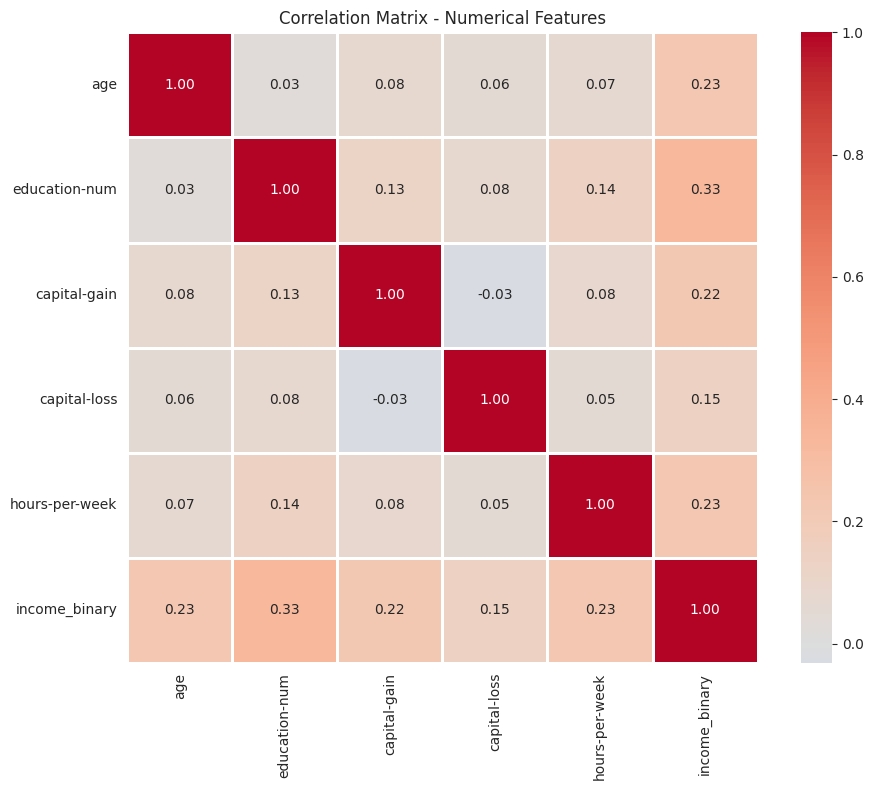

In [ ]:
# Convert target to numerical for correlation
df_corr = df.copy()
df_corr['income_binary'] = (df_corr['income'] == '>50K').astype(int)

# Select numerical columns
numerical_cols = df_corr[numerical_features + ['income_binary']].select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numerical_cols.corr()

print("\nCorrelation with Target (Income):")
print(correlation_matrix['income_binary'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

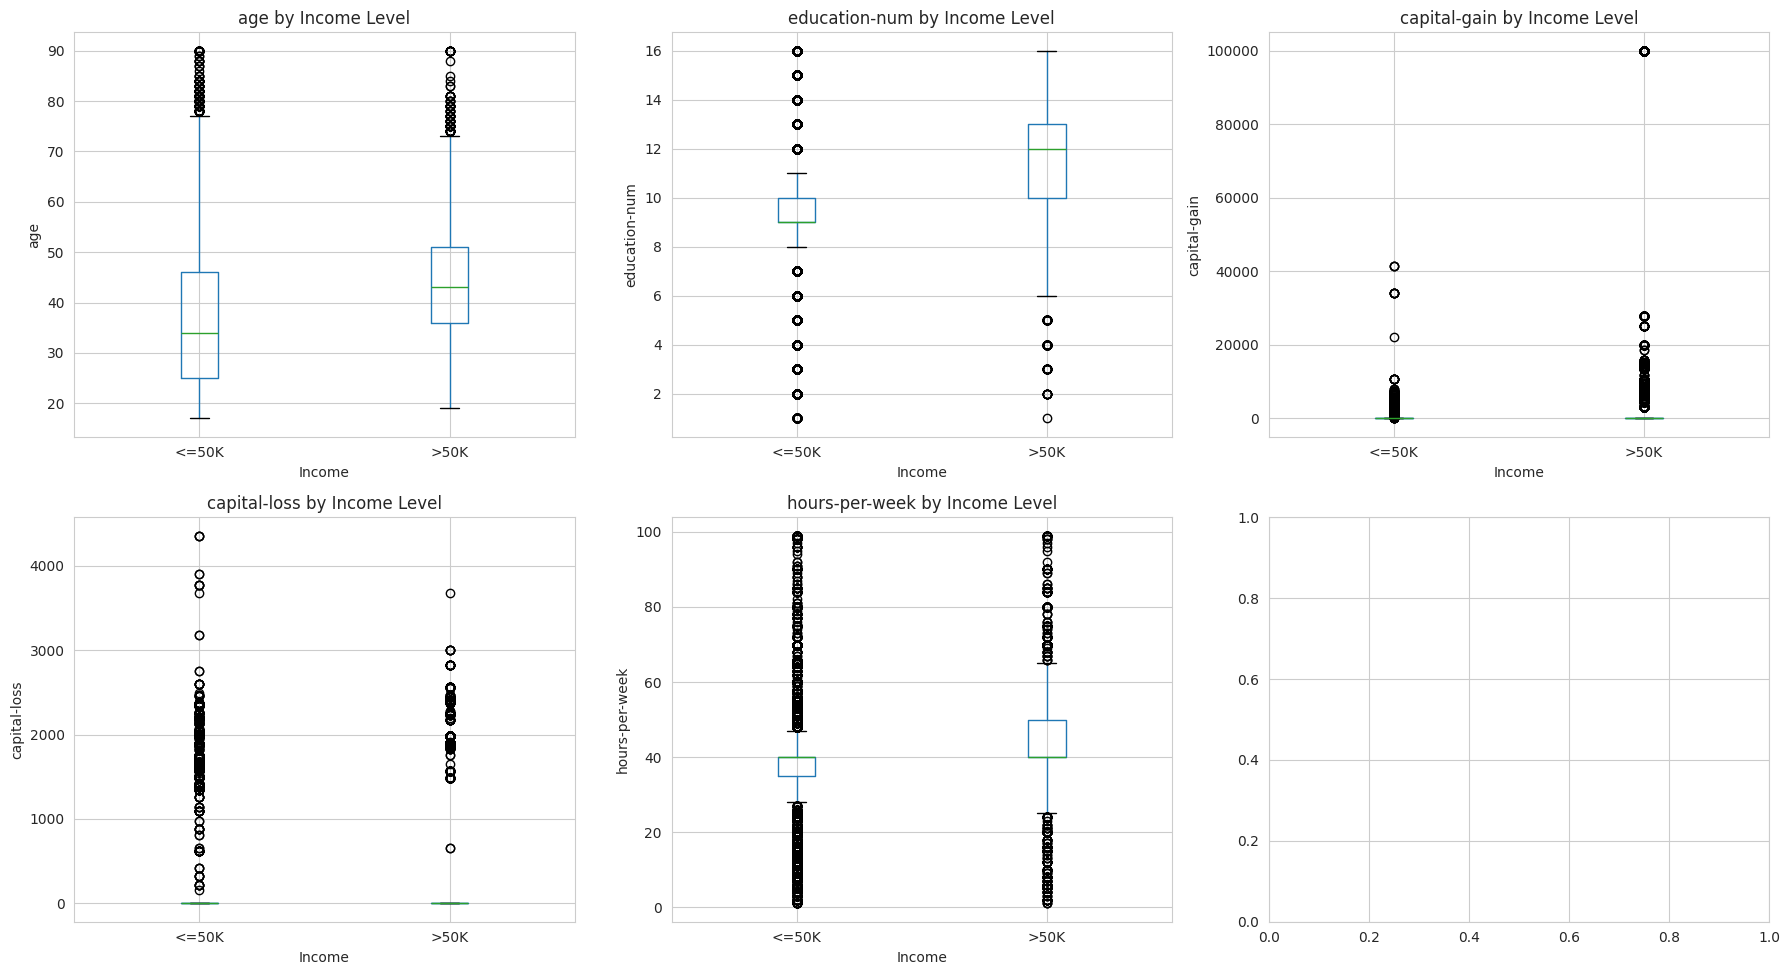

In [ ]:
#BIVARIATE ANALYSIS - Numerical VS Target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    df.boxplot(column=col, by='income', ax=axes[idx])
    axes[idx].set_title(f'{col} by Income Level')
    axes[idx].set_xlabel('Income')
    axes[idx].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.savefig('numerical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

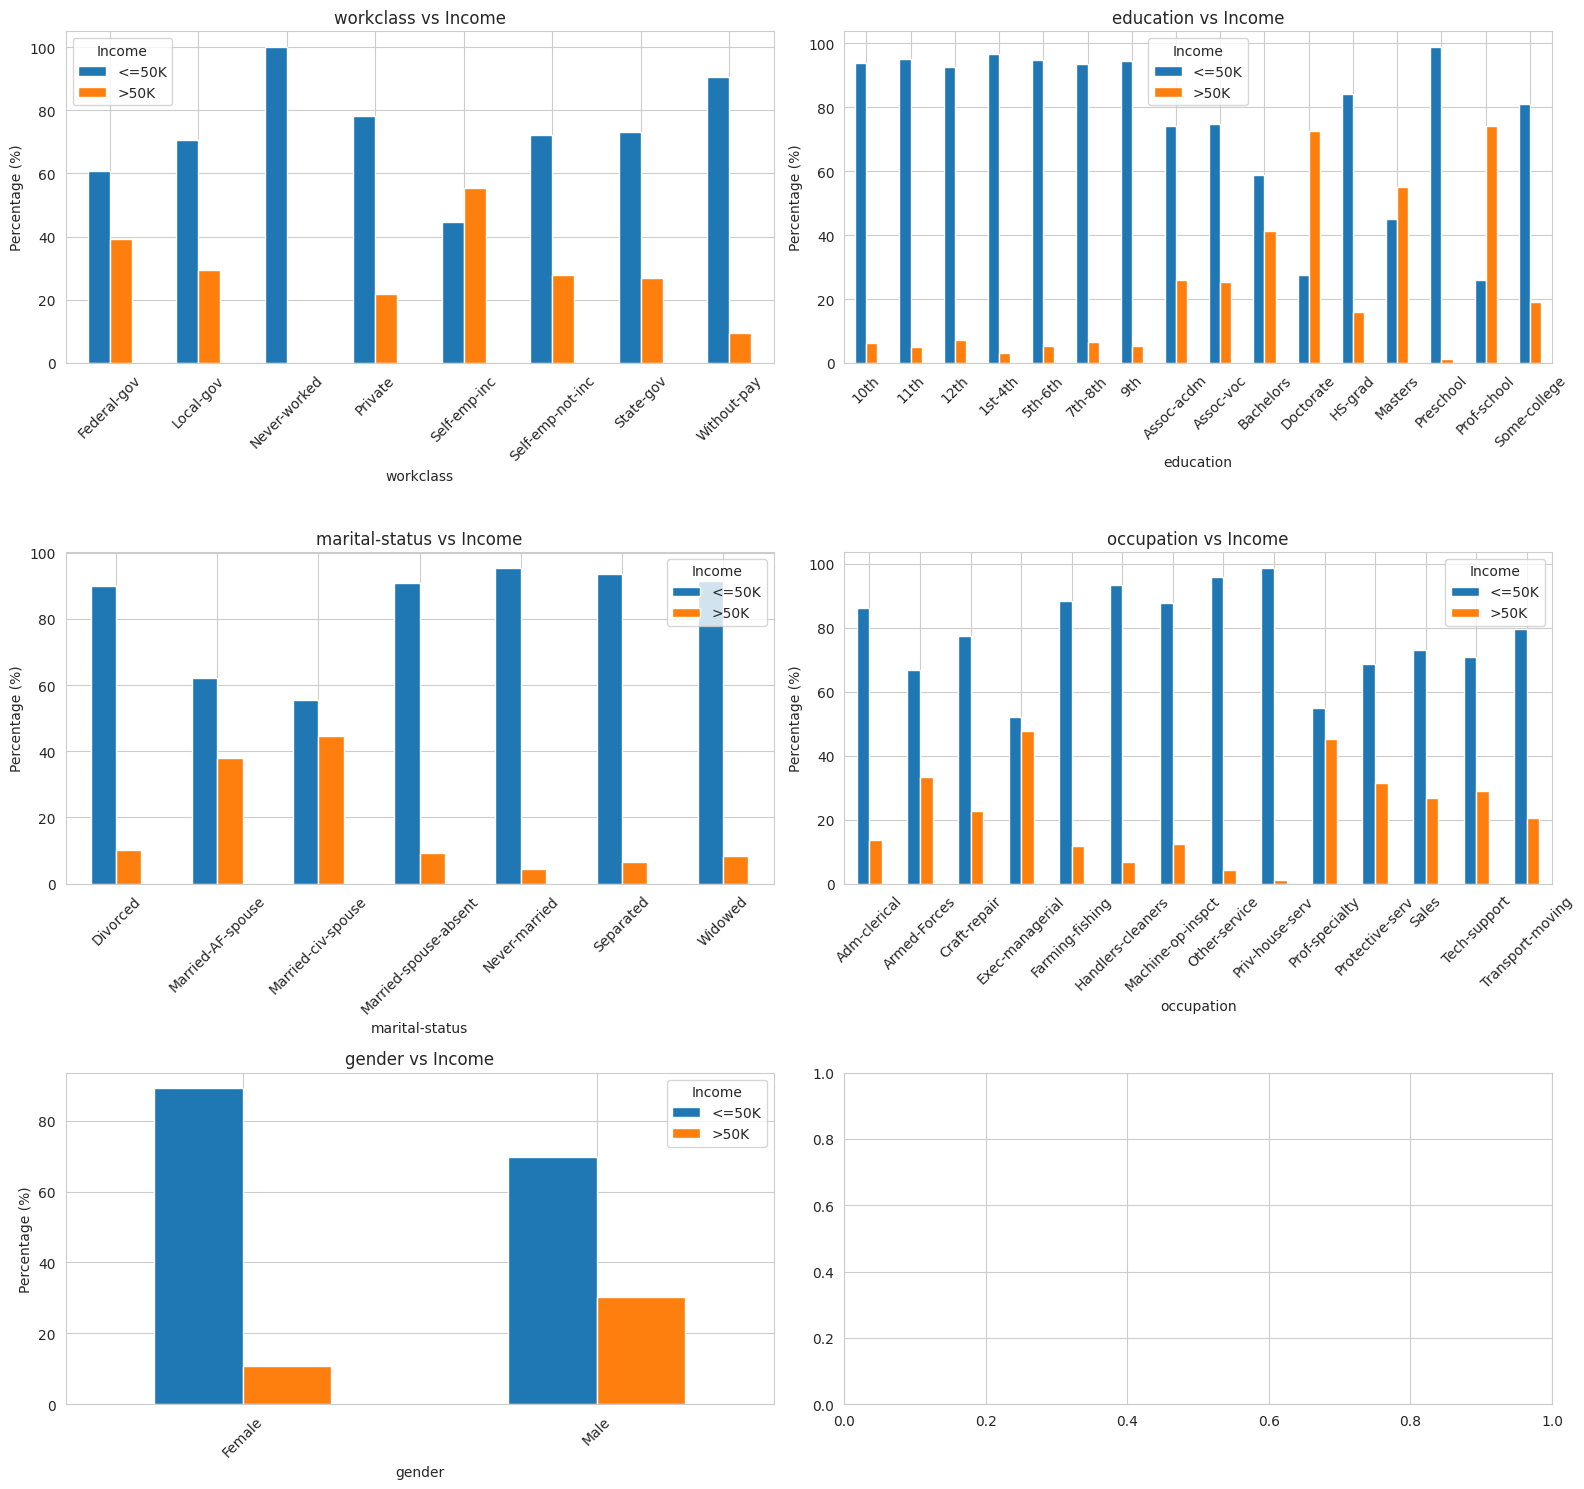

In [ ]:
#BIVARIATE ANALYSIS - CATEGORICAL VS TARGET

#  key categorical features for visualization
key_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'gender']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    # Create crosstab
    ct = pd.crosstab(df[col], df['income'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], stacked=False)
    axes[idx].set_title(f'{col} vs Income')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Income', loc='best')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

In [ ]:
# Handling missing values

# For categorical features, fill with mode
categorical_cols_with_missing = ['workclass', 'occupation', 'native-country']
for col in categorical_cols_with_missing:
    mode_value = df_processed[col].mode()[0]
    df_processed[col].fillna(mode_value, inplace=True)
    print(f"  - Filled '{col}' with mode: {mode_value}")

  - Filled 'workclass' with mode: Private
  - Filled 'occupation' with mode: Prof-specialty
  - Filled 'native-country' with mode: United-States


In [ ]:
# Verify no missing values remain
print(f"\nRemaining missing values: {df_processed.isnull().sum().sum()}")


Remaining missing values: 0


In [ ]:
# Handle Outliers using IQR method - capping: means keep the row but limit extreme values to a chosen maximum/minimum so they don’t dominate the model

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return original_outliers

# Apply outlier capping to specific features
outlier_cols = ['age', 'hours-per-week']  # More conservative - not capping capital gains/losses
for col in outlier_cols:
    outliers_count = cap_outliers(df_processed, col)
    print(f"  - Capped {outliers_count} outliers in '{col}'")


  - Capped 215 outliers in 'age'
  - Capped 13486 outliers in 'hours-per-week'


# Feature Engineering

In [ ]:
# Feature 1: Age Groups
print("\n 1 Creating Age Groups...")
df_processed['age_group'] = pd.cut(df_processed['age'],
                                    bins=[0, 25, 35, 45, 55, 100],
                                    labels=['Young', 'Adult', 'Middle-aged', 'Senior', 'Elderly'])
print("  - Created 'age_group' feature with 5 categories")


 1 Creating Age Groups...
  - Created 'age_group' feature with 5 categories


In [ ]:
# Feature 2: Working Hours Category
print("\n 2 Creating Working Hours Category...")
df_processed['work_hours_category'] = pd.cut(df_processed['hours-per-week'],
                                              bins=[0, 20, 40, 60, 100],
                                              labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])
print("  - Created 'work_hours_category' feature with 4 categories")



 2 Creating Working Hours Category...
  - Created 'work_hours_category' feature with 4 categories


In [ ]:
# Feature 3: Net_Capital
print("\n 3 Creating Net capital Feature...")
df_processed['net_capital'] = df_processed['capital-gain'] - df_processed['capital-loss']
print("  - Created 'net_capital' feature (capital-gain - capital-loss)")



 3 Creating Net capital Feature...
  - Created 'net_capital' feature (capital-gain - capital-loss)


In [ ]:
# Feature 4: Has Capital (Binary indicator)
print("\n 4 Creating Has Capital Indicator...")
df_processed['has_capital'] = ((df_processed['capital-gain'] > 0) |
                                (df_processed['capital-loss'] > 0)).astype(int)
print("  - Created 'has_capital' binary feature")


 4 Creating Has Capital Indicator...
  - Created 'has_capital' binary feature


In [ ]:
# Feature 5: Education Level - Simplified as Low, Medium, High
print("\n 5 Creating Education Level Categories...")
education_mapping = {
    'Preschool': 'Low', '1st-4th': 'Low', '5th-6th': 'Low', '7th-8th': 'Low',
    '9th': 'Low', '10th': 'Low', '11th': 'Medium', '12th': 'Medium',
    'HS-grad': 'Medium', 'Some-college': 'High', 'Assoc-voc': 'High',
    'Assoc-acdm': 'High', 'Bachelors': 'High', 'Masters': 'High',
    'Prof-school': 'High', 'Doctorate': 'High'
}
df_processed['education_level'] = df_processed['education'].map(education_mapping)
print("  - Created 'education_level' feature with 3 categories")


 5 Creating Education Level Categories...
  - Created 'education_level' feature with 3 categories


In [ ]:
#Feature 6: Marital Status
print("\n 6 Creating marital_simple category...")
# Normalize text first (trim spaces, consistent case)
df_processed["marital-status"] = (
    df_processed["marital-status"]
      .astype("string")
      .str.strip()
)

married_set = {"Married-civ-spouse", "Married-AF-spouse"}


# Binary flag: 1 = Married, 0 = Not-Married
df_processed["marital_simple"] = df_processed["marital-status"].isin(married_set).astype(int)

print("  - Created 'marital_simple' feature with binary feature")


 6 Creating marital_simple category...
  - Created 'marital_simple' feature with binary feature


In [ ]:
# Feature 7: Country Group (US =1 vs Non-US=0)
print("\n 7 Creating Country Group...")
df_processed['is_us'] = (df_processed['native-country'] == 'United-States').astype(int)
print("  - Created 'is_us' binary feature")


 7 Creating Country Group...
  - Created 'is_us' binary feature


In [ ]:
print(f" New dataset shape after feature engineering: {df_processed.shape}")

 New dataset shape after feature engineering: (48790, 21)


In [ ]:
# set engineered categoricals to 'category'
for c in ["age_group","work_hours_category","education_level"]:
    df_processed[c] = df_processed[c].astype("category")

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df_processed = df_processed.drop(columns=["native-country"], errors="ignore")

In [ ]:
df_processed = df_processed.drop(columns=["marital-status"], errors="ignore")

In [ ]:
df_processed = df_processed.drop(columns=["education"], errors="ignore")

In [ ]:
df_processed.head()

,age,workclass,education-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,age_group,work_hours_category,net_capital,has_capital,education_level,marital_simple,is_us
0,25,Private,7,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,<=50K,Young,Full-time,0,0,Medium,0,1
1,38,Private,9,Farming-fishing,Husband,White,Male,0,0,50.0,<=50K,Middle-aged,Overtime,0,0,Medium,1,1
2,28,Local-gov,12,Protective-serv,Husband,White,Male,0,0,40.0,>50K,Adult,Full-time,0,0,High,1,1
3,44,Private,10,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,>50K,Middle-aged,Full-time,7688,1,High,1,1
4,18,Private,10,Prof-specialty,Own-child,White,Female,0,0,32.5,<=50K,Young,Full-time,0,0,High,0,1


In [ ]:
#SEPARATING FEATURES AND TARGET

X = df_processed.drop('income', axis=1)
y = df_processed['income']  # This Keeps the as '>50K' and '<=50K'

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Target unique values: {y.unique()}")

Features (X) shape: (48790, 17)
Target (y) shape: (48790,)
Target unique values: ['<=50K' '>50K']


In [ ]:
 #Splitting the dataset as: 70% TRAIN, 15% VALIDATION, 15% TEST


# First split: 70% train, 30% temp (which will become 15% val + 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,  # 30% for validation + test
    random_state=42,
    stratify=y  # Maintain class balance
)

# Second split: Split the 30% into 15% validation and 15% test
# Since temp is 30%, splitting it 50-50 gives 15% each of original
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  # 50% of 30% = 15% of original
    random_state=42,
    stratify=y_temp
)

print(f"\n✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verify class distribution in each set
print("\nClass distribution:")
print("-" * 60)
for set_name, y_set in [('Training', y_train), ('Validation', y_val), ('Test', y_test)]:
    counts = y_set.value_counts()
    print(f"\n{set_name} Set:")
    for label, count in counts.items():
        pct = count / len(y_set) * 100
        print(f"  {label}: {count} ({pct:.2f}%)")

print("\n✓ SPLITS COMPLETE")
print("   - validation for threshold tuning and model selection")
print("   - test ONLY ONCE for final evaluation")


✓ Training set: 34153 samples (70.0%)
✓ Validation set: 7318 samples (15.0%)
✓ Test set: 7319 samples (15.0%)

Class distribution:
------------------------------------------------------------

Training Set:
  <=50K: 25976 (76.06%)
  >50K: 8177 (23.94%)

Validation Set:
  <=50K: 5566 (76.06%)
  >50K: 1752 (23.94%)

Test Set:
  <=50K: 5567 (76.06%)
  >50K: 1752 (23.94%)

✓ SPLITS COMPLETE
   - validation for threshold tuning and model selection
   - test ONLY ONCE for final evaluation


In [ ]:
#IDENTIFYING FEATURE TYPES

# Categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical features ({len(categorical_cols)}):")
for col in categorical_cols:
    n_unique = X_train[col].nunique()
    print(f"  - {col}: {n_unique} unique values")

print(f"\nNumerical features ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}: range [{X_train[col].min():.2f}, {X_train[col].max():.2f}]")


Categorical features (8):
  - workclass: 8 unique values
  - occupation: 14 unique values
  - relationship: 6 unique values
  - race: 5 unique values
  - gender: 2 unique values
  - age_group: 5 unique values
  - work_hours_category: 2 unique values
  - education_level: 3 unique values

Numerical features (9):
  - age: range [17.00, 78.00]
  - education-num: range [1.00, 16.00]
  - capital-gain: range [0.00, 99999.00]
  - capital-loss: range [0.00, 4356.00]
  - hours-per-week: range [32.50, 52.50]
  - net_capital: range [-4356.00, 99999.00]
  - has_capital: range [0.00, 1.00]
  - marital_simple: range [0.00, 1.00]
  - is_us: range [0.00, 1.00]


In [ ]:
#encoding the target variable
def encode_target(y_series):
    y_enc = (y_series.astype("string")
                        .str.strip()
                        .str.replace(".", "", regex=False)
                        .eq(">50K")
                        .astype(int))
    return y_enc

y_train = encode_target(y_train)
y_val   = encode_target(y_val)
y_test  = encode_target(y_test)

# Quick check
for name, y in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    print(f"{name} positive rate (>50K=1): {y.mean():.2%}")


Train positive rate (>50K=1): 23.94%
Val positive rate (>50K=1): 23.94%
Test positive rate (>50K=1): 23.94%


In [ ]:
# Numerical scaling using standardscaler and categorical scaling using OHE


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Defining the numeical colunm

continuous_nums  = [
    "age", "education-num", "capital-gain", "capital-loss",
    "hours-per-week", "net_capital",
]

binary_nums = ["marital_simple", "has_capital","is_us"]

categoricals = [
    "workclass", "occupation", "relationship", "race", "gender",
    "age_group", "work_hours_category", "education_level"
]

# make sure dtypes are consistent
for c in categorical_cols:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype("string")
        X_val[c]   = X_val[c].astype("string")
        X_test[c]  = X_test[c].astype("string")

# Build the preprocessing transformer
# Note:OneHotEncoder defaults to a memory-efficient sparse matrix.

ohe = OneHotEncoder(handle_unknown="ignore")  # sparse by default- memory-friendly

preprocess = ColumnTransformer([
    ("num_scaled", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc",  StandardScaler())
    ]), continuous_nums),
    ("num_binary", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent"))  # no scaler
    ]), binary_nums),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), categoricals),
], remainder="drop")



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Make OHE dense - to get pandas framework
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # use sparse=False if sklearn < 1.2

preprocess = ColumnTransformer(
    transformers=[
        ("num_scaled", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc",  StandardScaler())
        ]), continuous_nums),
        ("num_binary", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent"))
        ]), binary_nums),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe)  # now dense
        ]), categorical_cols),
    ],
    remainder="drop"
)

# Ask for pandas output
preprocess.set_output(transform="pandas")

preprocess.fit(X_train)
Xtr = preprocess.transform(X_train)  # pandas DataFrame with readable column names
Xva = preprocess.transform(X_val)
Xte = preprocess.transform(X_test)

In [ ]:
# Basic sanity checks
print("Train/Val/Test transformed shapes:", Xtr.shape, Xva.shape, Xte.shape)
print("Type:", type(Xtr))

# transformed DataFrame since set pandas output
print("\nTransformed columns:", len(Xtr.columns))
print(Xtr.head(3))
print(Xtr.info())

Train/Val/Test transformed shapes: (34153, 54) (7318, 54) (7319, 54)
Type: <class 'pandas.core.frame.DataFrame'>

Transformed columns: 54
       num_scaled__age  num_scaled__education-num  num_scaled__capital-gain  \
35760         1.497347                   2.306734                 -0.143952   
13966        -1.075879                  -0.420321                 -0.143952   
18617         0.173974                  -1.199479                 -0.143952   

       num_scaled__capital-loss  num_scaled__hours-per-week  \
35760                 -0.218333                    1.425989   
13966                 -0.218333                    1.425989   
18617                 -0.218333                   -0.190896   

       num_scaled__net_capital  num_binary__marital_simple  \
35760                -0.131625                           1   
13966                -0.131625                           0   
18617                -0.131625                           0   

       num_binary__has_capital  num_binary_

# Model Development

In [ ]:
#Helper function which can be reusal across all the model and compare the results

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def tune_threshold(y_true, y_prob, metric="f1"):
    """Grid-search a threshold on validation to optimize F1 (or a simple precision/recall blend)."""
    thresholds = np.linspace(0.05, 0.95, 19)
    best_t, best = 0.5, -1
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        if metric == "f1":
            score = f1_score(y_true, y_pred)
        elif metric == "balanced":  # average of precision & recall
            score = 0.5 * (precision_score(y_true, y_pred) + recall_score(y_true, y_pred))
        else:
            score = f1_score(y_true, y_pred)
        if score > best:
            best, best_t = score, t
    return best_t, best

def evaluate_split(y_true, y_prob, threshold):
    """Return a dict of metrics + confusion matrix for a given threshold."""
    y_pred = (y_prob >= threshold).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "PR-AUC": average_precision_score(y_true, y_prob),
        "ConfusionMatrix": confusion_matrix(y_true, y_pred)
    }

def plot_roc_pr(y_true, y_prob, title_prefix="Model"):
    from sklearn.metrics import roc_curve, precision_recall_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    pr, rc, _ = precision_recall_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    pr_auc  = auc(rc, pr)

    plt.figure(figsize=(12,4))
    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0,1],[0,1],'--',lw=1)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"{title_prefix} ROC (AUC={roc_auc:.3f})")
    # PR
    plt.subplot(1,2,2)
    plt.plot(rc, pr, lw=2)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"{title_prefix} PR (AUC={pr_auc:.3f})")
    plt.tight_layout(); plt.show()

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline([
    ("pre", preprocess),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))
])

lr_param_dist = {
    "clf__C": [0.1, 0.3, 1, 3, 10],
    "clf__solver": ["lbfgs", "liblinear"],  # both fine for binary with l2
    "clf__penalty": ["l2"]
}

lr_cv = RandomizedSearchCV(
    lr_pipe, lr_param_dist, n_iter=10, cv=5, scoring="f1",
    n_jobs=-1, random_state=42, refit=True, verbose=0
)
lr_cv.fit(X_train, y_train)

lr_val_prob = lr_cv.predict_proba(X_val)[:, 1]
lr_t, _ = tune_threshold(y_val, lr_val_prob, metric="f1")
lr_test_prob = lr_cv.predict_proba(X_test)[:, 1]
lr_test_metrics = evaluate_split(y_test, lr_test_prob, lr_t)

print("LogReg best params:", lr_cv.best_params_)
print("LogReg threshold (val):", lr_t)
print("LogReg test metrics:", {k: (v if isinstance(v, np.ndarray) else round(v,4)) for k,v in lr_test_metrics.items()})

LogReg best params: {'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__C': 3}
LogReg threshold (val): 0.6
LogReg test metrics: {'Accuracy': 0.8438, 'Precision': 0.6425, 'Recall': 0.7837, 'F1': 0.7061, 'ROC-AUC': np.float64(0.915), 'PR-AUC': np.float64(0.7868), 'ConfusionMatrix': array([[4803,  764],
       [ 379, 1373]])}


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("pre", preprocess),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced"))
])

rf_param_dist = {
    "clf__n_estimators": [300, 500, 700],
    "clf__max_depth": [None, 12, 20],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", 0.5, 0.7],
}

rf_cv = RandomizedSearchCV(
    rf_pipe, rf_param_dist, n_iter=12, cv=5, scoring="f1",
    n_jobs=-1, random_state=42, refit=True, verbose=0
)
rf_cv.fit(X_train, y_train)

rf_val_prob = rf_cv.predict_proba(X_val)[:, 1]
rf_t, _ = tune_threshold(y_val, rf_val_prob, metric="f1")
rf_test_prob = rf_cv.predict_proba(X_test)[:, 1]
rf_test_metrics = evaluate_split(y_test, rf_test_prob, rf_t)

print("RF best params:", rf_cv.best_params_)
print("RF threshold (val):", rf_t)
print("RF test metrics:", {k: (v if isinstance(v, np.ndarray) else round(v,4)) for k,v in rf_test_metrics.items()})


RF best params: {'clf__n_estimators': 500, 'clf__min_samples_leaf': 4, 'clf__max_features': 0.5, 'clf__max_depth': 20}
RF threshold (val): 0.6
RF test metrics: {'Accuracy': 0.8602, 'Precision': 0.6872, 'Recall': 0.7637, 'F1': 0.7234, 'ROC-AUC': np.float64(0.9218), 'PR-AUC': np.float64(0.8149), 'ConfusionMatrix': array([[4958,  609],
       [ 414, 1338]])}


Catboost Model

In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cb_pipe = Pipeline([
    ("pre", preprocess),
    ("clf", CatBoostClassifier(
        depth=6, learning_rate=0.1, l2_leaf_reg=3, n_estimators=400,
        loss_function="Logloss", eval_metric="F1", random_seed=42, verbose=False
    ))
])

# Small randomized search (CatBoost does well even with defaults)
cb_param_dist = {
    "clf__depth": [6, 8],
    "clf__learning_rate": [0.05, 0.1],
    "clf__l2_leaf_reg": [3, 5, 7],
    "clf__n_estimators": [300, 500, 800],
}

cb_cv = RandomizedSearchCV(
    cb_pipe, cb_param_dist, n_iter=10, cv=5, scoring="f1",
    n_jobs=-1, random_state=42, refit=True, verbose=0
)
cb_cv.fit(X_train, y_train)

cb_val_prob = cb_cv.predict_proba(X_val)[:, 1]
cb_t, _ = tune_threshold(y_val, cb_val_prob, metric="f1")
cb_test_prob = cb_cv.predict_proba(X_test)[:, 1]
cb_test_metrics = evaluate_split(y_test, cb_test_prob, cb_t)

print("CatBoost best params:", cb_cv.best_params_)
print("CatBoost threshold (val):", cb_t)
print("CatBoost test metrics:", {k: (v if isinstance(v, np.ndarray) else round(v,4)) for k,v in cb_test_metrics.items()})

CatBoost best params: {'clf__n_estimators': 800, 'clf__learning_rate': 0.05, 'clf__l2_leaf_reg': 5, 'clf__depth': 6}
CatBoost threshold (val): 0.39999999999999997
CatBoost test metrics: {'Accuracy': 0.874, 'Precision': 0.7331, 'Recall': 0.7449, 'F1': 0.739, 'ROC-AUC': np.float64(0.9316), 'PR-AUC': np.float64(0.8334), 'ConfusionMatrix': array([[5092,  475],
       [ 447, 1305]])}


MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([
    ("pre", preprocess),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        alpha=1e-4,
        batch_size=256,
        learning_rate_init=1e-3,
        max_iter=200,
        early_stopping=True,
        random_state=42
    ))
])

mlp_param_dist = {
    "clf__hidden_layer_sizes": [(64,), (64,32)],
    "clf__alpha": [1e-4, 1e-3],
    "clf__learning_rate_init": [1e-3, 5e-4],
}

mlp_cv = RandomizedSearchCV(
    mlp_pipe, mlp_param_dist, n_iter=8, cv=5, scoring="f1",
    n_jobs=-1, random_state=42, refit=True, verbose=0
)
mlp_cv.fit(X_train, y_train)

mlp_val_prob = mlp_cv.predict_proba(X_val)[:, 1]
mlp_t, _ = tune_threshold(y_val, mlp_val_prob, metric="f1")
mlp_test_prob = mlp_cv.predict_proba(X_test)[:, 1]
mlp_test_metrics = evaluate_split(y_test, mlp_test_prob, mlp_t)

print("MLP best params:", mlp_cv.best_params_)
print("MLP threshold (val):", mlp_t)
print("MLP test metrics:", {k: (v if isinstance(v, np.ndarray) else round(v,4)) for k,v in mlp_test_metrics.items()})

MLP best params: {'clf__learning_rate_init': 0.001, 'clf__hidden_layer_sizes': (64,), 'clf__alpha': 0.0001}
MLP threshold (val): 0.35
MLP test metrics: {'Accuracy': 0.8503, 'Precision': 0.6592, 'Recall': 0.7751, 'F1': 0.7125, 'ROC-AUC': np.float64(0.9193), 'PR-AUC': np.float64(0.7969), 'ConfusionMatrix': array([[4865,  702],
       [ 394, 1358]])}


Save model manually to drive

In [ ]:
# ----- Choose a folder in Drive -----
import os, json, joblib
from datetime import datetime

SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/ML_CW_010/Models"
os.makedirs(SAVE_DIR, exist_ok=True)
print("Saving to:", SAVE_DIR)

# ====== What we expect you already have in memory ======
# - Trained CV objects: lr_cv, rf_cv, cb_cv, mlp_cv    (each has .best_estimator_)
# - Dict of tuned thresholds: model_thresh            (e.g., {"LogReg":0.47, ...})
# - Results table: results_df                         (with columns Model, Accuracy, Precision, Recall, F1, ROC-AUC, PR-AUC)
# - Preprocessor used inside pipelines: preprocess    (already inside best_estimator_)

# ----- 1) Save all best pipelines together -----
models = {
    "LogReg":       lr_cv.best_estimator_,
    "RandomForest": rf_cv.best_estimator_,
    "CatBoost":     cb_cv.best_estimator_,
    "MLP":          mlp_cv.best_estimator_,
}
joblib.dump(models, os.path.join(SAVE_DIR, "models.joblib"))
print("Saved:", os.path.join(SAVE_DIR, "models.joblib"))

# ----- 2) Save tuned thresholds -----
joblib.dump(model_thresh, os.path.join(SAVE_DIR, "thresholds.joblib"))
with open(os.path.join(SAVE_DIR, "thresholds.json"), "w") as f:
    json.dump({k: float(v) for k, v in model_thresh.items()}, f, indent=2)
print("Saved thresholds (joblib + json)")

# ----- 3) Save test-set comparison table -----
results_df.to_csv(os.path.join(SAVE_DIR, "test_results.csv"), index=False)
print("Saved:", os.path.join(SAVE_DIR, "test_results.csv"))

# ----- 4) Save transformed feature names (for explainability later) -----
try:
    preprocess.set_output(transform="pandas")
    tx_cols = preprocess.transform(X_train).columns.tolist()
    with open(os.path.join(SAVE_DIR, "transformed_feature_names.txt"), "w") as f:
        f.write("\n".join(tx_cols))
    print("Saved transformed_feature_names.txt")
except Exception as e:
    print("Skipping feature-names save:", e)

# ----- 5) Save which model was best by F1 -----
best_row = results_df.sort_values("F1", ascending=False).iloc[0]
meta = {
    "best_model_name": best_row["Model"],
    "saved_at": datetime.now().isoformat(timespec="seconds")
}
with open(os.path.join(SAVE_DIR, "meta.json"), "w") as f:
    json.dump(meta, f, indent=2)
print("Saved meta.json")

Saving to: /content/drive/MyDrive/Colab Notebooks/ML_CW_010/Models
Saved: /content/drive/MyDrive/Colab Notebooks/ML_CW_010/Models/models.joblib
Saved thresholds (joblib + json)
Saved: /content/drive/MyDrive/Colab Notebooks/ML_CW_010/Models/test_results.csv
Saved transformed_feature_names.txt
Saved meta.json


# Evaluation & Comparison

In [ ]:
# Combine test-set metrics into a table
rows = []
rows.append(("LogReg",   lr_test_metrics["Accuracy"], lr_test_metrics["Precision"], lr_test_metrics["Recall"], lr_test_metrics["F1"], lr_test_metrics["ROC-AUC"], lr_test_metrics["PR-AUC"]))
rows.append(("RandomForest", rf_test_metrics["Accuracy"], rf_test_metrics["Precision"], rf_test_metrics["Recall"], rf_test_metrics["F1"], rf_test_metrics["ROC-AUC"], rf_test_metrics["PR-AUC"]))
rows.append(("CatBoost", cb_test_metrics["Accuracy"], cb_test_metrics["Precision"], cb_test_metrics["Recall"], cb_test_metrics["F1"], cb_test_metrics["ROC-AUC"], cb_test_metrics["PR-AUC"]))
rows.append(("MLP",      mlp_test_metrics["Accuracy"], mlp_test_metrics["Precision"], mlp_test_metrics["Recall"], mlp_test_metrics["F1"], mlp_test_metrics["ROC-AUC"], mlp_test_metrics["PR-AUC"]))

results_df = pd.DataFrame(rows, columns=["Model","Accuracy","Precision","Recall","F1","ROC-AUC","PR-AUC"])
print("\nTest-set comparison (sorted by F1):")
print(results_df.sort_values("F1", ascending=False).round(4))


Test-set comparison (sorted by F1):
          Model  Accuracy  Precision  Recall      F1  ROC-AUC  PR-AUC
2      CatBoost    0.8740     0.7331  0.7449  0.7390   0.9316  0.8334
1  RandomForest    0.8602     0.6872  0.7637  0.7234   0.9218  0.8149
3           MLP    0.8503     0.6592  0.7751  0.7125   0.9193  0.7969
0        LogReg    0.8438     0.6425  0.7837  0.7061   0.9150  0.7868


Confusion matrices + ROC/PR for the top model


Best model by F1: CatBoost

Confusion matrix (best model @ tuned threshold):
 [[5092  475]
 [ 447 1305]]


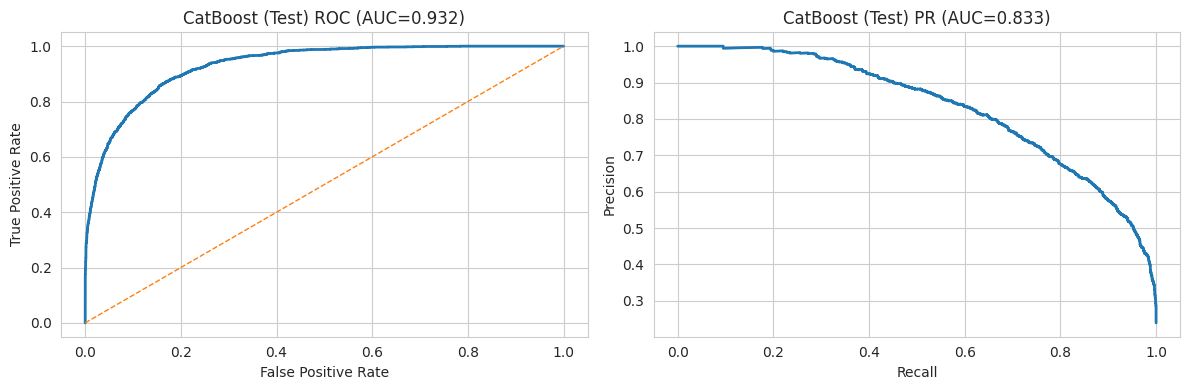

In [ ]:
# Identify best by F1
best_model_name = results_df.sort_values("F1", ascending=False).iloc[0]["Model"]
print("\nBest model by F1:", best_model_name)

# Pull its y_prob on test and tuned threshold
model_probs = {
    "LogReg":       lr_test_prob,
    "RandomForest": rf_test_prob,
    "CatBoost":     cb_test_prob,
    "MLP":          mlp_test_prob
}
model_thresh = {
    "LogReg":       lr_t,
    "RandomForest": rf_t,
    "CatBoost":     cb_t,
    "MLP":          mlp_t
}

best_prob = model_probs[best_model_name]
best_t    = model_thresh[best_model_name]

# Confusion matrix
cm = confusion_matrix(y_test, (best_prob >= best_t).astype(int))
print("\nConfusion matrix (best model @ tuned threshold):\n", cm)

# ROC & PR curves
plot_roc_pr(y_test, best_prob, title_prefix=f"{best_model_name} (Test)")

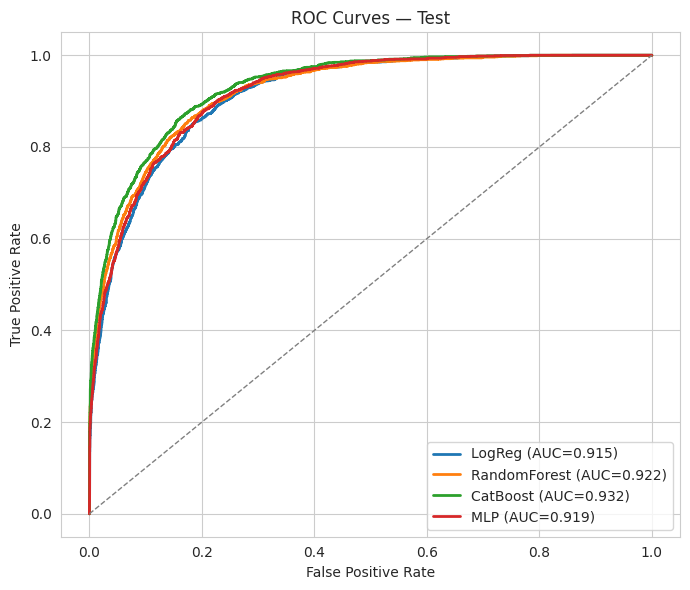

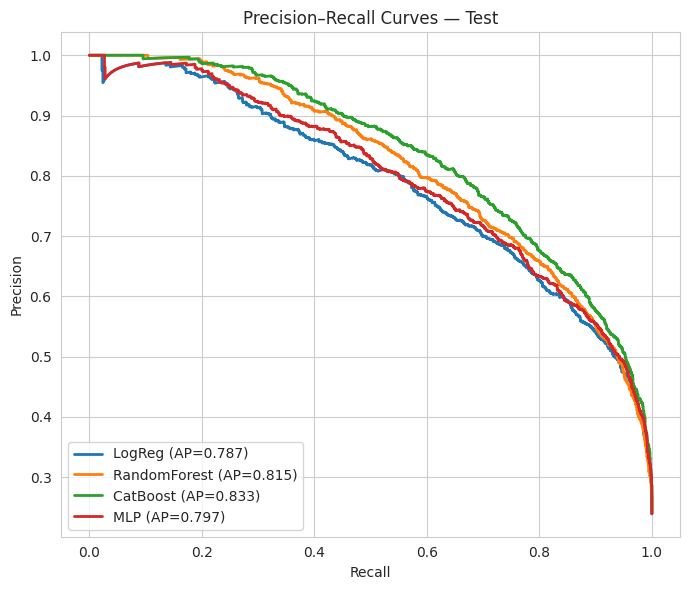

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, average_precision_score

# If not already defined, build these from your earlier variables:
# model_probs = {
#     "LogReg": lr_test_prob,
#     "RandomForest": rf_test_prob,
#     "CatBoost": cb_test_prob,
#     "MLP": mlp_test_prob
# }
# model_thresh = {
#     "LogReg": lr_t,
#     "RandomForest": rf_t,
#     "CatBoost": cb_t,
#     "MLP": mlp_t
# }

# ROC curves (all models on one plot)
plt.figure(figsize=(7,6))
for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], "--", lw=1, color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Test")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_all_models.png", dpi=200, bbox_inches="tight")
plt.show()

# Precision–Recall curve
plt.figure(figsize=(7,6))
for name, prob in model_probs.items():
    precision, recall, _ = precision_recall_curve(y_test, prob)
    ap = average_precision_score(y_test, prob)
    plt.plot(recall, precision, lw=2, label=f"{name} (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curves — Test")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig("pr_all_models.png", dpi=200, bbox_inches="tight")
plt.show()


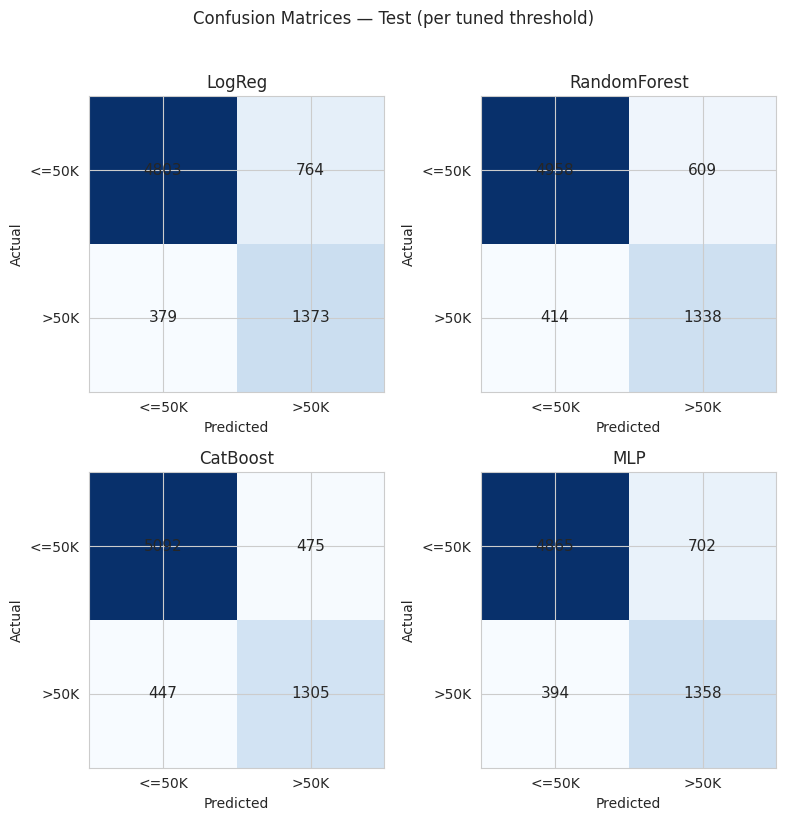

In [ ]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.ravel()

for ax, (name, prob) in zip(axes, model_probs.items()) :
    thr = model_thresh[name]
    y_pred = (prob >= thr).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, cmap="Blues")
    ax.set_title(name)
    ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(["<=50K", ">50K"]); ax.set_yticklabels(["<=50K", ">50K"])
    # annotate counts
    for (i, j), v in np.ndenumerate(cm):
        ax.text(j, i, str(v), ha="center", va="center", fontsize=11)
plt.suptitle("Confusion Matrices — Test (per tuned threshold)", y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig("confusion_matrices_all.png", dpi=200, bbox_inches="tight")
plt.show()

### Error Analysis for catBoost Model

In [ ]:

# Error analysis for CatBoost
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Get probs & threshold for CatBoost (robust fallback)
try:
    # If you created dictionaries earlier
    best_prob = model_probs["CatBoost"]
    best_t    = model_thresh["CatBoost"]
except Exception:
    # Fallback: use best CV estimator for CatBoost
    best_prob = cb_cv.predict_proba(X_test)[:, 1]
    best_t    = cb_t

y_pred = (best_prob >= best_t).astype(int)

# Which class is misclassified most
print("\nClassification report (Test, CatBoost @ tuned threshold):")
print(classification_report(y_test, y_pred, target_names=["<=50K"," >50K"], digits=3))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix (rows=actual, cols=pred):\n", cm)
tn, fp, fn, tp = cm.ravel()
print(f"\nCounts  TN:{tn}  FP:{fp}  FN:{fn}  TP:{tp}")

# Highest-confidence mistakes: Top FP & Top FN
err_df = X_test.copy().reset_index(drop=False).rename(columns={"index":"row_idx"})
err_df["y_true"] = y_test.values
err_df["y_prob"] = best_prob
err_df["y_pred"] = y_pred

# Choose a compact set of columns to show
display_cols = [
    "row_idx","y_true","y_pred","y_prob",
    "age","education-num","hours-per-week","capital-gain","capital-loss",
    "workclass","occupation","relationship","marital_simple","is_us"
]
display_cols = [c for c in display_cols if c in err_df.columns]  # keep only available

# Top False Positives: predicted >50K with high confidence but actually <=50K
top_fp = err_df[(err_df.y_true==0) & (err_df.y_pred==1)] \
               .sort_values("y_prob", ascending=False).head(10)
print("\nTop 10 False Positives (highest confidence):")
print(top_fp[display_cols])

# Top False Negatives: predicted <=50K with low probability but actually >50K
top_fn = err_df[(err_df.y_true==1) & (err_df.y_pred==0)] \
               .sort_values("y_prob", ascending=True).head(10)
print("\nTop 10 False Negatives (lowest predicted prob):")
print(top_fn[display_cols])

# "High residuals" records (|y - p|)
err_df["residual"] = np.abs(err_df["y_true"] - err_df["y_prob"])
worst_residuals = err_df.sort_values("residual", ascending=False).head(15)
print("\nRecords with largest residuals (|y - p|):")
print(worst_residuals[ [c for c in display_cols+["residual"] if c in worst_residuals.columns] ])

# slice error rates by key groups (fairness/error concentration)
def slice_metrics(frame, slice_col):
    rows = []
    for level, g in frame.groupby(slice_col):
        if len(g) < 30:  # skip tiny groups for stability
            continue
        tp = ((g.y_true==1) & (g.y_pred==1)).sum()
        fp = ((g.y_true==0) & (g.y_pred==1)).sum()
        fn = ((g.y_true==1) & (g.y_pred==0)).sum()
        tn = ((g.y_true==0) & (g.y_pred==0)).sum()
        prec = tp/(tp+fp) if (tp+fp)>0 else 0.0
        rec  = tp/(tp+fn) if (tp+fn)>0 else 0.0
        f1   = (2*prec*rec)/(prec+rec) if (prec+rec)>0 else 0.0
        acc  = (tp+tn)/len(g)
        rows.append([slice_col, level, len(g), acc, prec, rec, f1, tp, fp, fn, tn])
    return pd.DataFrame(rows, columns=["feature","level","n","accuracy","precision","recall","f1","tp","fp","fn","tn"]) \
             .sort_values(["feature","f1"], ascending=[True, False])

slice_cols = [c for c in ["gender","race","workclass","relationship",
                          "education_level","marital_simple","is_us",
                          "age_group","work_hours_category"] if c in err_df.columns]
if slice_cols:
    print("\nSlice performance (first 10 rows):")
    all_slices = pd.concat([slice_metrics(err_df, c) for c in slice_cols], axis=0)
    print(all_slices.head(10))


Classification report (Test, CatBoost @ tuned threshold):
              precision    recall  f1-score   support

       <=50K      0.919     0.915     0.917      5567
        >50K      0.733     0.745     0.739      1752

    accuracy                          0.874      7319
   macro avg      0.826     0.830     0.828      7319
weighted avg      0.875     0.874     0.874      7319


Confusion matrix (rows=actual, cols=pred):
 [[5092  475]
 [ 447 1305]]

Counts  TN:5092  FP:475  FN:447  TP:1305

Top 10 False Positives (highest confidence):
      row_idx  y_true  y_pred    y_prob  age  education-num  hours-per-week  \
5367    34734       0       1  0.996928   51             13            40.0   
6984    13783       0       1  0.988244   51             10            40.0   
1360    21404       0       1  0.983920   28             14            52.5   
5200    25655       0       1  0.983522   64             10            35.0   
4894    45268       0       1  0.980349   57             11

### MLFlow

In [ ]:
%pip install -q mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/

In [ ]:
# This is for local storage --------------------------
#import mlflow
#print("MLflow version:", mlflow.__version__)
#mlflow.set_tracking_uri("mlruns")
#mlflow.set_experiment("adult_income_cw")
#print("Tracking URI:", mlflow.get_tracking_uri())

2025/10/06 12:16:51 INFO mlflow.tracking.fluent: Experiment with name 'adult_income_cw' does not exist. Creating a new experiment.


MLflow version: 3.4.0
Tracking URI: mlruns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, mlflow

# Choose your Drive folder (adjust if you like)
BASE_DIR   = "/content/drive/MyDrive/Colab Notebooks/ML_CW_010/ML_Flow"
MLF_DIR    = os.path.join(BASE_DIR, "mlruns")
os.makedirs(MLF_DIR, exist_ok=True)

print("Will track runs at:", MLF_DIR)

# Point MLflow to Drive (use file: URI)
mlflow.set_tracking_uri(f"file:{MLF_DIR}")
mlflow.set_experiment("adult_income_cw")

print("MLflow version:", mlflow.__version__)
print("Tracking URI:", mlflow.get_tracking_uri())

2025/10/06 14:04:46 INFO mlflow.tracking.fluent: Experiment with name 'adult_income_cw' does not exist. Creating a new experiment.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Will track runs at: /content/drive/MyDrive/Colab Notebooks/ML_CW_010/ML_Flow/mlruns
MLflow version: 3.4.0
Tracking URI: file:/content/drive/MyDrive/Colab Notebooks/ML_CW_010/ML_Flow/mlruns


In [ ]:
#Shared helpers

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve
)
import numpy as np, matplotlib.pyplot as plt

def tune_threshold(y_true, y_prob, metric="f1"):
    ts = np.linspace(0.05, 0.95, 19)
    best_t, best = 0.5, -1
    for t in ts:
        y_pred = (y_prob >= t).astype(int)
        score = f1_score(y_true, y_pred) if metric=="f1" else 0.5*(precision_score(y_true,y_pred)+recall_score(y_true,y_pred))
        if score > best: best, best_t = score, t
    return float(best_t), float(best)

def eval_with_threshold(y_true, y_prob, t):
    y_pred = (y_prob >= t).astype(int)
    return dict(
        test_accuracy=accuracy_score(y_true, y_pred),
        test_precision=precision_score(y_true, y_pred),
        test_recall=recall_score(y_true, y_pred),
        test_f1=f1_score(y_true, y_pred),
        test_roc_auc=roc_auc_score(y_true, y_prob),
        test_pr_auc=average_precision_score(y_true, y_prob),
    ), confusion_matrix(y_true, y_pred)


In [ ]:
#Generic runner that logs to MLflow

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

def run_cv_and_log(name, pipe, param_dist, X_train, y_train, X_val, y_val, X_test, y_test):
    cv = RandomizedSearchCV(
        pipe, param_dist, n_iter=min(12, len(list(zip(*param_dist.values()))[0])) if param_dist else 1,
        cv=5, scoring="f1", n_jobs=-1, random_state=42, refit=True, verbose=0
    )

    with mlflow.start_run(run_name=name):
        mlflow.sklearn.autolog(log_models=True)
        cv.fit(X_train, y_train)

        # Probs
        val_prob  = cv.predict_proba(X_val)[:,1] if hasattr(cv.best_estimator_[-1], "predict_proba") else cv.decision_function(X_val)
        test_prob = cv.predict_proba(X_test)[:,1] if hasattr(cv.best_estimator_[-1], "predict_proba") else cv.decision_function(X_test)

        # Threshold tuned on validation
        t_star, _ = tune_threshold(y_val, val_prob, metric="f1")
        mlflow.log_metric("val_best_threshold", t_star)

        # Final test metrics
        metrics, cm = eval_with_threshold(y_test, test_prob, t_star)
        mlflow.log_metrics(metrics)
        mlflow.log_params(cv.best_params_)

        # Artifacts: confusion matrix + ROC/PR
        plt.figure(figsize=(4,4))
        plt.imshow(cm, cmap="Blues"); plt.title(f"{name} — Confusion")
        for (i,j), v in np.ndenumerate(cm): plt.text(j, i, str(v), ha="center", va="center")
        plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout()
        cm_path = f"cm_{name}.png"; plt.savefig(cm_path, dpi=160); plt.close()
        mlflow.log_artifact(cm_path)

        fpr, tpr, _ = roc_curve(y_test, test_prob)
        plt.figure(); plt.plot(fpr, tpr); plt.plot([0,1],[0,1],"--")
        plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"{name} — ROC"); plt.tight_layout()
        roc_path = f"roc_{name}.png"; plt.savefig(roc_path, dpi=160); plt.close()
        mlflow.log_artifact(roc_path)

        pr, rc, _ = precision_recall_curve(y_test, test_prob)
        plt.figure(); plt.plot(rc, pr); plt.xlabel("Recall"); plt.ylabel("Precision")
        plt.title(f"{name} — PR"); plt.tight_layout()
        pr_path = f"pr_{name}.png"; plt.savefig(pr_path, dpi=160); plt.close()
        mlflow.log_artifact(pr_path)

        print(f"{name} logged. run_id:", mlflow.active_run().info.run_id)
    return cv, t_star

In [ ]:
#Calling for all 4 models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_pipe = Pipeline([("pre", preprocess), ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))])
lr_grid = {"clf__C":[0.1,0.3,1,3,10], "clf__solver":["lbfgs","liblinear"], "clf__penalty":["l2"]}
lr_cv, lr_t = run_cv_and_log("LogReg", lr_pipe, lr_grid, X_train, y_train, X_val, y_val, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([("pre", preprocess), ("clf", RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced"))])
rf_grid = {"clf__n_estimators":[300,500,700], "clf__max_depth":[None,12,20], "clf__min_samples_leaf":[1,2,4], "clf__max_features":["sqrt",0.5,0.7]}
rf_cv, rf_t = run_cv_and_log("RandomForest", rf_pipe, rf_grid, X_train, y_train, X_val, y_val, X_test, y_test)

# CatBoost
from catboost import CatBoostClassifier
cb_pipe = Pipeline([("pre", preprocess),
                    ("clf", CatBoostClassifier(
                        depth=6, learning_rate=0.1, l2_leaf_reg=3, n_estimators=400,
                        loss_function="Logloss", eval_metric="F1", random_seed=42, verbose=False))])
cb_grid = {"clf__depth":[6,8], "clf__learning_rate":[0.05,0.1], "clf__l2_leaf_reg":[3,5,7], "clf__n_estimators":[300,500,800]}
cb_cv, cb_t = run_cv_and_log("CatBoost", cb_pipe, cb_grid, X_train, y_train, X_val, y_val, X_test, y_test)

# MLP
from sklearn.neural_network import MLPClassifier
mlp_pipe = Pipeline([("pre", preprocess),
                     ("clf", MLPClassifier(hidden_layer_sizes=(64,32), activation="relu",
                                           alpha=1e-4, batch_size=256, learning_rate_init=1e-3,
                                           max_iter=200, early_stopping=True, random_state=42))])
mlp_grid = {"clf__hidden_layer_sizes":[(64,), (64,32)], "clf__alpha":[1e-4,1e-3], "clf__learning_rate_init":[1e-3,5e-4]}
mlp_cv, mlp_t = run_cv_and_log("MLP", mlp_pipe, mlp_grid, X_train, y_train, X_val, y_val, X_test, y_test)

2025/10/06 14:06:39 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


LogReg logged. run_id: 63919f45dff34d789f5f6d724cdded0d


2025/10/06 14:13:04 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


RandomForest logged. run_id: b4885756d8c043579660c4bb2e274b80


2025/10/06 14:16:23 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


CatBoost logged. run_id: dc73ca14f45a499db56a2c928d23b037


2025/10/06 14:17:11 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


MLP logged. run_id: 27b32b07b39f4301929a37c5f95c9750


In [ ]:
import mlflow, pandas as pd
df = mlflow.search_runs(experiment_names=["adult_income_cw"])
print(df[["run_id","tags.mlflow.runName","metrics.test_f1","metrics.test_precision","metrics.test_recall","metrics.test_pr_auc","metrics.test_roc_auc"]].sort_values("metrics.test_f1", ascending=False).head(10))

                              run_id  tags.mlflow.runName  metrics.test_f1  \
8   dc73ca14f45a499db56a2c928d23b037             CatBoost         0.730142   
1   27b32b07b39f4301929a37c5f95c9750                  MLP         0.712487   
15  63919f45dff34d789f5f6d724cdded0d               LogReg         0.705943   
11  b4885756d8c043579660c4bb2e274b80         RandomForest         0.701934   
0   0a1b7ba18d8840af905895101bc68028     unruly-finch-925              NaN   
2   27bd60e290fb4f98b7ef4da35a2a68d9  overjoyed-zebra-329              NaN   
3   6edf946138c54f5a97078050f8401aa4    colorful-croc-973              NaN   
4   1704980409504004a4bfb01cb8715a65      melodic-gnu-778              NaN   
5   2aabfd032aa2413093f2431a204e9e0c         big-rook-909              NaN   
6   41886348b43141ec99bd7f09443ec039   adaptable-seal-214              NaN   

    metrics.test_precision  metrics.test_recall  metrics.test_pr_auc  \
8                 0.686965             0.779110             0.830697 

In [ ]:
#MLflow UI 

# Interpretability & Insights

Permutation importance


Top features by permutation importance (original features):
marital_simple         0.107168
occupation             0.049830
education-num          0.049023
net_capital            0.040563
age                    0.040225
capital-gain           0.025348
hours-per-week         0.022200
relationship           0.018646
gender                 0.009606
capital-loss           0.009249
education_level        0.006987
workclass              0.005587
work_hours_category    0.003067
is_us                  0.001379
age_group              0.000916
dtype: float64


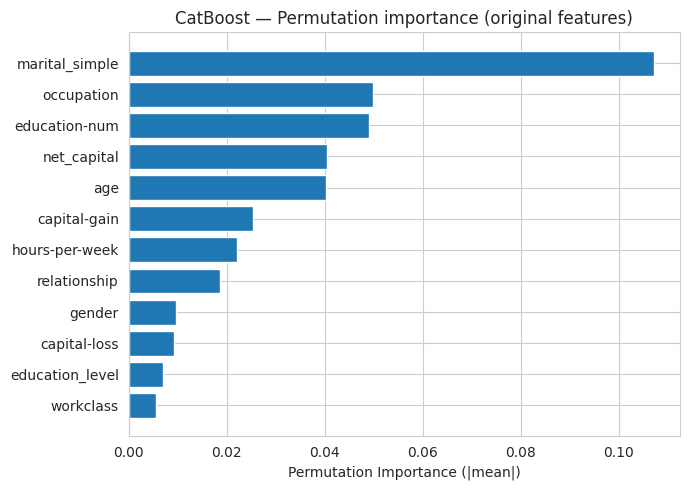

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

pipe = cb_cv.best_estimator_  # CatBoost pipeline

# Permutation importance on the PIPELINE (acts on original X columns)
r = permutation_importance(pipe, X_val, y_val,
                           n_repeats=10, random_state=42,
                           scoring="f1", n_jobs=-1)

pi_series = pd.Series(np.abs(r.importances_mean), index=X_val.columns) \
              .sort_values(ascending=False)

print("\nTop features by permutation importance (original features):")
print(pi_series.head(15))

# Plot top-12
topk = pi_series.head(12)[::-1]
plt.figure(figsize=(7,5))
plt.barh(topk.index, topk.values)
plt.xlabel("Permutation Importance (|mean|)")
plt.title("CatBoost — Permutation importance (original features)")
plt.tight_layout(); plt.show()

SHAP values


Top 10 features by SHAP (aggregated to original):
orig
marital_simple     1.109548
age                0.742398
occupation         0.631946
education-num      0.485526
relationship       0.455818
net_capital        0.399511
hours-per-week     0.370540
education_level    0.271402
capital-gain       0.245297
age_group          0.196692
Name: mean_abs_shap, dtype: float64


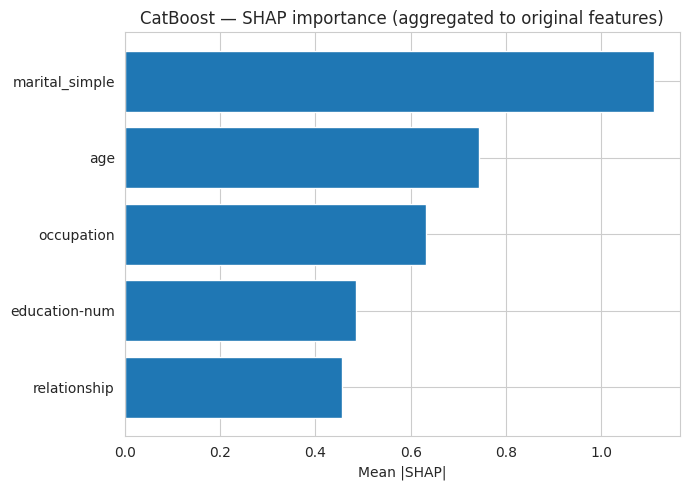

In [ ]:
# SHAP with correct aggregation back to original features ---
import shap, numpy as np, pandas as pd
import matplotlib.pyplot as plt

pipe = cb_cv.best_estimator_
pre  = pipe.named_steps["pre"]
pre.set_output(transform="pandas")

# Transformed validation matrix and column names
Xv_tx  = pre.transform(X_val)              # pandas DataFrame
tx_cols = Xv_tx.columns.tolist()

# You already defined these earlier; re-use the same lists
# categorical_cols = [...]
# numerical_cols   = [...]   # includes your continuous + binary numeric features

def to_original(col):
    """
    Map transformed column name -> original feature name.
    - Strip any sklearn pipeline prefixes before the last "__"
    - For categoricals, drop the OHE level suffix after "<feature>_"
    """
    base = col.split("__")[-1]  # remove 'num_scaled__', 'cat__', etc.
    # If it's one-hot, it will look like "occupation_Exec-managerial"
    for cat in categorical_cols:
        if base.startswith(cat + "_"):
            return cat
    return base  # numeric features (e.g: age, education-num, hours-per-week, net_Capital, ...)

# CatBoost model
model = pipe.named_steps["clf"]

# TreeExplainer for CatBoost
explainer = shap.TreeExplainer(model)
sv = explainer.shap_values(Xv_tx)          # shape (n_samples, n_features) for binary

# Mean |SHAP| per transformed column
mean_abs = np.abs(sv).mean(axis=0)
shap_df = pd.DataFrame({"column": tx_cols, "mean_abs_shap": mean_abs})
shap_df["orig"] = shap_df["column"].apply(to_original)

# Aggregate back to original features
orig_shap = shap_df.groupby("orig")["mean_abs_shap"].sum().sort_values(ascending=False)

print("\nTop 10 features by SHAP (aggregated to original):")
print(orig_shap.head(10))

# Plot Top 5 (or change to head(10))
topk = orig_shap.head(5)[::-1]
plt.figure(figsize=(7,5))
plt.barh(topk.index, topk.values)
plt.xlabel("Mean |SHAP|")
plt.title("CatBoost — SHAP importance (aggregated to original features)")
plt.tight_layout(); plt.show()

Permutation plot for all 4 models

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import shap
from sklearn.inspection import permutation_importance

# Using fitted best pipelines
pipes = {
    "LogReg":        lr_cv.best_estimator_,
    "RandomForest":  rf_cv.best_estimator_,
    "CatBoost":      cb_cv.best_estimator_,
    "MLP":           mlp_cv.best_estimator_,
}

# Ensure pandas output from the preprocessor for stable names
for p in pipes.values():
    p.named_steps["pre"].set_output(transform="pandas")

# Transformed column names for mapping
tx_cols = pipes["CatBoost"].named_steps["pre"].transform(X_train).columns.tolist()


def to_original(col):
    """
    Map transformed col -> original base feature.
    - Strip any pipeline prefixes before the last '__'
    - One-hot: '<feat>_<level>' -> '<feat>'
    """
    base = col.split("__")[-1]
    for cat in categorical_cols:
        if base.startswith(cat + "_"):
            return cat
    return base

def top_bar(ax, series, title, topn=10):
    s = series.dropna().sort_values(ascending=False).head(topn)[::-1]
    ax.barh(s.index, s.values)
    ax.set_title(title)
    ax.tick_params(axis="y", labelsize=9)

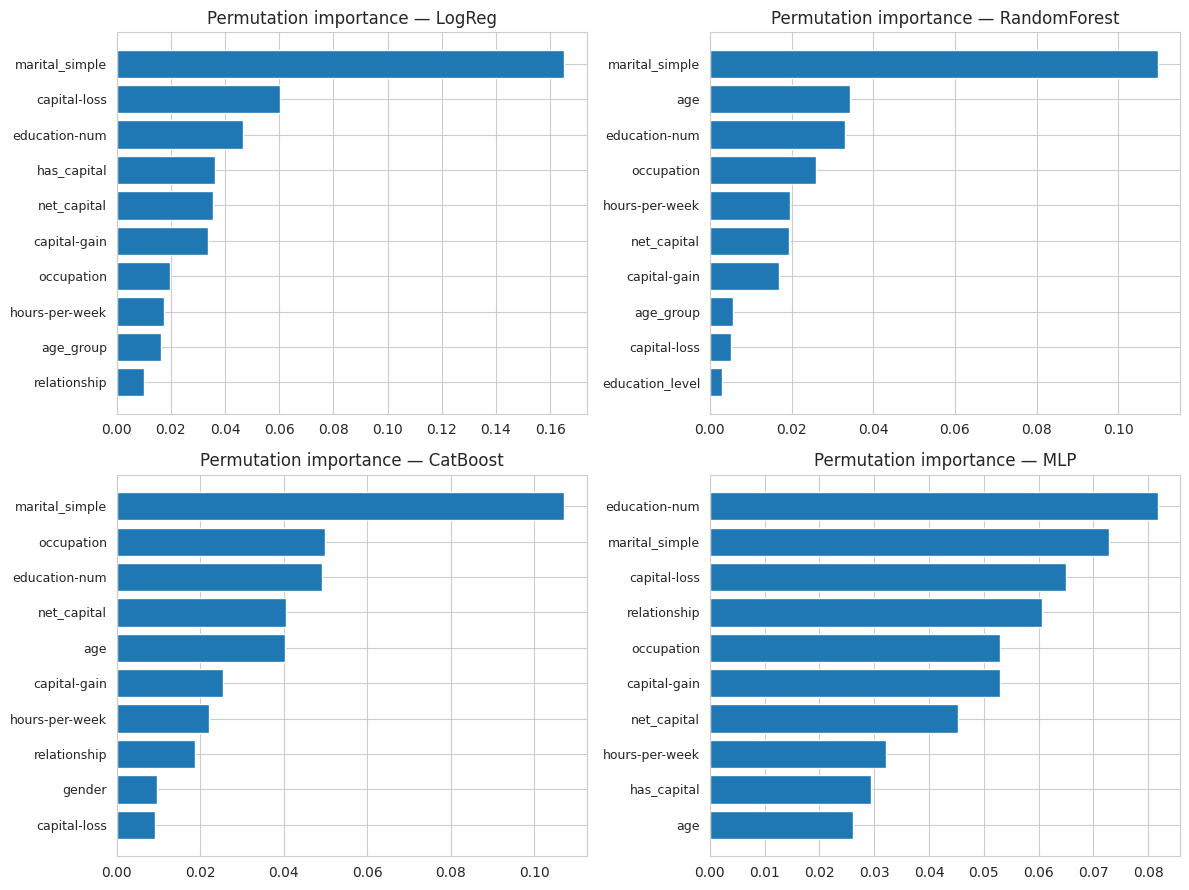

In [ ]:
#Permutation importance
perm_all = {}

for name, pipe in pipes.items():
    r = permutation_importance(pipe, X_val, y_val, n_repeats=10,
                               random_state=42, scoring="f1", n_jobs=-1)
    pi = pd.Series(np.abs(r.importances_mean), index=X_val.columns)
    perm_all[name] = pi.sort_values(ascending=False)

# Plot 2×2 grid of top-10 per model
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.ravel()
for ax, name in zip(axes, ["LogReg","RandomForest","CatBoost","MLP"]):
    top_bar(ax, perm_all[name], f"Permutation importance — {name}", topn=10)
plt.tight_layout(); plt.show()


Save all the models and json file for deployment in Docker

In [ ]:
#Code to reload the models from drive...


import os, json, joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import numpy as np

#SAVE_DIR = ""  # same path used to save-------------------------------------------------------------------

# ---- Load artifacts ----
#models      = joblib.load(os.path.join(SAVE_DIR, "models.joblib"))------remove # to run
thresholds  = joblib.load(os.path.join(SAVE_DIR, "thresholds.joblib"))
meta        = json.load(open(os.path.join(SAVE_DIR, "meta.json")))

print("Loaded models:", list(models.keys()))
print("Best model per meta:", meta.get("best_model_name"))

# Pick a model to evaluate (use meta or set manually)
model_name = meta.get("best_model_name", "CatBoost")
pipe = models[model_name]
t    = float(thresholds.get(model_name, 0.5))

# Evaluate on your current split
(X_test, y_test must exist; if not, recreate with the same code/splits you used before)
y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= t).astype(int)

metrics = {
    "Accuracy":  accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall":    recall_score(y_test, y_pred),
    "F1":        f1_score(y_test, y_pred),
    "ROC-AUC":   roc_auc_score(y_test, y_prob),
    "PR-AUC":    average_precision_score(y_test, y_prob),
}
metrics


In [ ]:
# Save once (after you split)
#import joblib
#joblib.dump((X_train, X_val, X_test, y_train, y_val, y_test), os.path.join(SAVE_DIR, "splits.joblib"))

# Later:
#X_train, X_val, X_test, y_train, y_val, y_test = joblib.load(os.path.join(SAVE_DIR, "splits.joblib"))

# Deployment using Docker

Deployment was completed locally by creating a service folder containing models.joblib, threshold.json, Dockerfile, requirements.txt, and app.py, and running the container with Docker Desktop. All files were uploaded to GitHub except models.joblib due to its large file size.